# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Elluy Gabriel Panambe
- **Email:** elluygabrielpanambe@gmail.com
- **ID Dicoding:** elluy_gabriel_panambe_c0M1

## Menentukan Pertanyaan Bisnis

- What are the best-selling and least-selling products?
- What is the demographic profile of the customers, and are there any differences in purchasing preferences among them?
- Where are the majority of customers located based on geographical location?
- Who are the most recently active customers (recency)?
- Which customers shop the most frequently (frequency)?
- Which customers generate the highest revenue (monetary)?

## Import Semua Packages/Library yang Digunakan

In [682]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg

## Data Wrangling

### Gathering Data

In [683]:
orders_df = pd.read_csv('data/orders_dataset.csv')
items_df = pd.read_csv('data/order_items_dataset.csv')
products_df = pd.read_csv('data/products_dataset.csv')
payments_df = pd.read_csv('data/order_payments_dataset.csv')
reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
customers_df = pd.read_csv('data/customers_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
category_df = pd.read_csv('data/product_category_name_translation.csv')

full_df = {'orders_df': orders_df,
        'items_df': items_df,
        'products_df': products_df,
        'payments_df': payments_df,
        'reviews_df': reviews_df,
        'customers_df': customers_df,
        'sellers_df': sellers_df,
        'geo_df': geolocation_df,
        'category_df': category_df}

In [684]:
full_df['orders_df'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [685]:
full_df['items_df'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [686]:
full_df['products_df'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [687]:
full_df['payments_df'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [688]:
full_df['reviews_df'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [689]:
full_df['customers_df'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [690]:
full_df['sellers_df'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [691]:
full_df['geo_df'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [692]:
full_df['category_df'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- The datasets have been successfully loaded into dataframes.
- Each dataframe represents a different aspect of the e-commerce data, such as orders, items, products, payments, reviews, customers, sellers, geolocation, and category translations.

### Assessing Data

In [693]:
# Check for All of The Data Types
for key in full_df:
    print(full_df[key].info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [694]:
# Check for Duplicates
for key in full_df:
    duplicates= full_df[key].duplicated().sum()
    print(f"{key} has {duplicates} duplicate rows")

orders_df has 0 duplicate rows
items_df has 0 duplicate rows
products_df has 0 duplicate rows
payments_df has 0 duplicate rows
reviews_df has 0 duplicate rows
customers_df has 0 duplicate rows
sellers_df has 0 duplicate rows
geo_df has 261831 duplicate rows
category_df has 0 duplicate rows


In [695]:
# Check for Missing Values
for key in full_df:
    print(full_df[key].isnull().sum())
    print('\n')

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


review_id                

In [696]:
# Descriptive Statistics
for key in full_df:
    print(full_df[key].describe(include='all'))
    print('\n')

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

**Insight:**
- The data types for each column in all dataframes have been checked.
- Duplicate rows have been identified and counted for each dataframe.
- Missing values have been identified for each dataframe.
- Descriptive statistics for each dataframe have been generated, including count, mean, std, min, 25%, 50%, 75%, and max values.

### Cleaning Data

#### Convert Data Types

In [697]:
# Convert 'shipping_limit_date' column in 'items_df' to datetime format
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  full_df['items_df'][column] = pd.to_datetime(full_df['items_df'][column])

In [698]:
# Convert 'review_creation_date' and 'review_answer_timestamp' columns in 'reviews_df' to datetime format
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  full_df['reviews_df'][column] = pd.to_datetime(full_df['reviews_df'][column])

In [699]:
# Convert multiple columns in 'orders_df' to datetime format
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date",
               "order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  full_df['orders_df'][column] = pd.to_datetime(full_df['orders_df'][column])

In [700]:
# Print the value counts for 'order_status' column in 'orders_df'
print(full_df['orders_df']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


#### Review Data

In [701]:
# Fill missing values in 'reviews_df' with "no comment"
full_df['reviews_df'].fillna(value="no comment", inplace=True)

#### Orders Data

In [702]:
print(full_df['orders_df']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [703]:
# Create a new column 'delivered_on_time' to check if the delivery was on time or late
full_df['orders_df']['delivered_on_time'] = np.where(full_df['orders_df']['order_delivered_customer_date'] < full_df['orders_df']['order_estimated_delivery_date'], 'On Time', 'Late')

#### Products Data

In [704]:
# Drop unnecessary columns from 'products_df'
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

full_df['products_df'].drop(product_drop_cols, axis= 1, inplace= True)

In [705]:
# Fill missing values in 'product_category_name' with 'other'
full_df['products_df'].loc[full_df['products_df']['product_category_name'].isnull(), 'product_category_name'] = 'other'

In [706]:
# Fill missing values in 'product_photos_qty' with 0
full_df['products_df'].loc[full_df['products_df']['product_photos_qty'].isnull(), 'product_photos_qty'] = 0

#### Geolocation Data

In [707]:
# remove duplicate data
full_df['geo_df'].drop_duplicates(inplace=True)

#### Category Data

**Insight:**
- The data types for each column in all dataframes have been converted to the appropriate format.
- Missing values have been filled in for the 'product_category_name' column in the 'products_df' dataframe.
- Unnecessary columns have been dropped from the 'products_df' dataframe.
- Duplicate rows have been removed from the 'geo_df' dataframe.
- Missing values have been filled in for the 'product_photos_qty' column in the 'products_df' dataframe.
- Missing values have been filled in for the 'review_comment_message' column in the 'reviews_df' dataframe.
- The 'order_status' column in the 'orders_df' dataframe has been reviewed.
- The dataframes have been cleaned and are now ready for further analysis. 

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [708]:
full_df['customers_df'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
20291,6e082ad6c4aba5873b45ab0369fc8543,22d4b7698f19293a194d173a87079c8a,13970,itapira,SP
75555,8425348e16b68a762119a16c1d807eb0,dc3986d8bd2609353c09c9c629809ec0,14740,viradouro,SP
11032,b1737c34c3a1db8806af041483301a7c,5a85f706b2059c3cd55287e105d8d5ea,37580,monte siao,MG
72902,b9e9bab1de28c72a9a14806830cc81c8,eb7db70437d4e216fde81a8f935e6d5f,6330,carapicuiba,SP
83389,d85bc3e743a27ffdcaf0878bb7d6bf2f,3d0a9404e95ba394aa1684983c3451e4,28990,saquarema,RJ


In [709]:
full_df['customers_df'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [710]:
full_df['customers_df']['customer_id'].is_unique

True

In [711]:
full_df['customers_df']['customer_id'].duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [712]:
full_df['customers_df'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [713]:
full_df['customers_df'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore payments_df


In [714]:
full_df['payments_df'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [715]:
full_df['payments_df'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51234,9e2d5a5568e945a766c01200f5f3cdc8,1,credit_card,2,141.86
19776,6a333077739385e594ea01b12faf9323,1,credit_card,2,131.73
58450,36749cbf5c327d95990050cbaa0f41fd,1,credit_card,10,931.37
81987,108c3238d247dead3fd7423cf8990c5b,1,credit_card,1,30.23
14576,4c7e0a5ac91085b463608e9c32589610,1,boleto,1,137.37


### Explore orders_df

In [716]:
full_df['orders_df']['delivered_on_time'].describe()

count       99441
unique          2
top       On Time
freq        88649
Name: delivered_on_time, dtype: object

In [717]:
full_df['orders_df'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
74348,166e8da2582560e757c1c41e4a4148c7,221624054ca47ae560a9af1059268c30,delivered,2017-09-19 22:16:32,2017-09-20 01:38:17,2017-09-20 21:27:55,2017-09-27 17:43:27,2017-10-10,On Time
86202,ac446e82125c862fbe4c638d69f807bb,259d52789dc5f2323c01238c73a28abc,unavailable,2017-04-06 13:17:49,2017-04-07 06:42:27,NaT,NaT,2017-04-28,Late
33446,80eae376fddb50c28eb0e4857691de4f,02035a6c43039fa299e0492df023bad2,delivered,2018-08-07 09:31:09,2018-08-07 09:45:14,2018-08-13 15:27:00,2018-08-15 20:43:38,2018-08-10,Late
88197,c0d9cb07f94365a3f747472d6121a158,29351e4f1fcfd1468cd282296d2e4d72,delivered,2018-05-07 20:27:12,2018-05-07 20:51:25,2018-05-10 16:37:00,2018-05-11 23:47:00,2018-05-17,On Time
37207,bf210c81ef1a94cbfb1bd7b2767a0cdb,d98fbfa5100d65442fa7dcb30be6770c,delivered,2017-08-18 17:58:20,2017-08-18 18:24:26,2017-08-21 21:03:52,2017-08-25 22:32:58,2017-09-08,On Time


### Explore customers_df & orders_df

#### Merge customers_df & orders_df

In [718]:
cust_orders_df = pd.merge(
    left=full_df['customers_df'],
    right=full_df['orders_df'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


In [719]:
cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [720]:
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [721]:
cust_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [722]:
cust_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

#### Merge payments_df & reviews_df

In [723]:
pay_rev_df = pd.merge(
    left=full_df['payments_df'],
    right=full_df['reviews_df'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
pay_rev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [724]:
pay_rev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [725]:
pay_rev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [726]:
pay_rev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})
   

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Merge customers_orders & payments_reviews

In [727]:
cust_orders_pay_rev_df = pd.merge(
    left=cust_orders_df,
    right=pay_rev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

cust_orders_pay_rev_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore items_df & sellers_df

#### Merge items_df & sellers_df

In [728]:
item_seller_df = pd.merge(
    left=full_df['items_df'],
    right=full_df['sellers_df'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [729]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [730]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)


seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products_df & category_df

#### Merge products_df & category_df

In [731]:
product_category_df = pd.merge(
    left=full_df['products_df'],
    right=full_df['category_df'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

product_category_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [732]:
product_category_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [733]:
product_category_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Merge item_seller & product_category

In [734]:
sellers_df = pd.merge(
    left=item_seller_df,
    right=product_category_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,1.0,garden_tools


In [735]:
sellers_df.sort_values(by="price", ascending=False)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP,utilidades_domesticas,2.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR,pcs,4.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO,artes,2.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP,eletroportateis,2.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP,eletroportateis,2.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP,beleza_saude,3.0,health_beauty
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP,beleza_saude,3.0,health_beauty
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG,construcao_ferramentas_construcao,5.0,construction_tools_construction
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG,construcao_ferramentas_construcao,5.0,construction_tools_construction


In [736]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geo_df

In [737]:
full_df['geo_df'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
149986,6030,-23.551978,-46.772626,osasco,SP
257721,11608,-23.791920,-45.399330,são sebastião,SP
383906,18125,-23.514846,-47.254836,aluminio,SP
770732,68473,-4.250497,-49.950199,novo repartimento,PA
956022,93211,-29.797689,-51.185800,sapucaia do sul,RS


In [738]:
full_df['geo_df'].describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [739]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [740]:
full_df['geo_df']['geolocation_city'] = full_df['geo_df']['geolocation_city'].apply(pretty_string)

In [741]:
full_df['geo_df'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

In [742]:
full_df['geo_df'][full_df['geo_df']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niteroi,RJ
470807,24230,-22.905032,-43.114682,niteroi,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### Explore All Data

#### Merge all data

In [743]:
main_data = pd.merge(
    left=cust_orders_pay_rev_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

main_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_photos_qty,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,utilidades_domesticas,3.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,moveis_escritorio,1.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,casa_conforto,1.0,home_confort


In [744]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 0 to 119142
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated_del

In [745]:
main_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [746]:
main_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [747]:
main_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [748]:
main_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [749]:
main_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

### Convert main_data_df to .csv

In [750]:
# Specify the path where to save the CSV file
output_csv_path = 'dashboard/main_data.csv'

# Save the main_data to a CSV file
main_data.to_csv(output_csv_path, index=False)

**Insight:**
- The customers_df dataframe has been explored, including sampling, descriptive statistics, and checking for unique and duplicated customer_id values.
- The payments_df dataframe has been explored, including grouping by payment_type and sampling.
- The orders_df dataframe has been explored, including the delivered_on_time column and sampling.
- The customers_df and orders_df dataframes have been merged to analyze customer orders by city, state, and zip code.
- The payments_df and reviews_df dataframes have been merged to analyze payment types and review scores.
- The items_df and sellers_df dataframes have been merged to analyze seller locations by city and state.
- The products_df and category_df dataframes have been merged to analyze product categories.
- All dataframes have been merged into a single dataframe for comprehensive analysis.
- The merged dataframe has been saved as a CSV file for further use.

## Visualization & Explanatory Analysis

- What are the best-selling and least-selling products?
- Do they profit more from cheap or from expensive products?
- What is the demographic profile of the customers, and are there any differences in purchasing preferences among them?
- Where are the majority of customers located based on geographical location?

### Pertanyaan 1: What are the best-selling and least-selling products?

In [751]:
sum_order_items_df = main_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


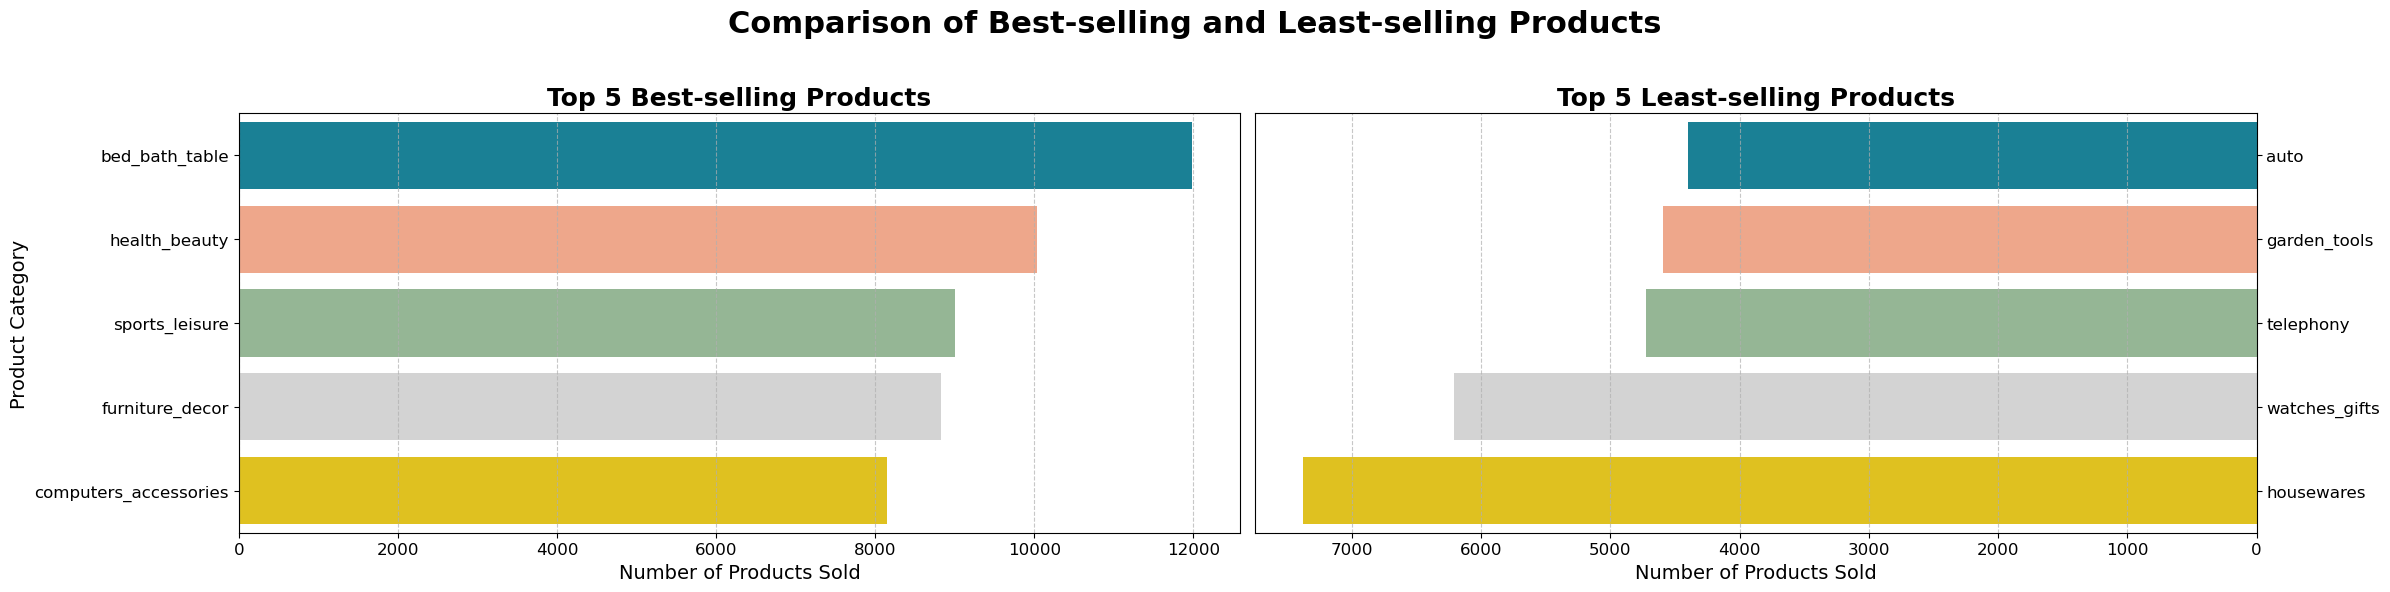

In [752]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define color palette with better contrast
colors = ["#068DA9", "#FFA07A", "#8FBC8F", "#D3D3D3", "#FFD700"]

# Plot Best-selling products
sns.barplot(
    x="products", 
    y="product_category_name_english", 
    data=sum_order_items_df.head(5), 
    hue="product_category_name_english",  # Assigning y to hue
    palette=colors, 
    legend=False,  # Hide the legend
    ax=ax[0]
)
ax[0].set_ylabel("Product Category", fontsize=14)
ax[0].set_xlabel("Number of Products Sold", fontsize=14)
ax[0].set_title("Top 5 Best-selling Products", loc="center", fontsize=18, weight='bold')
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].grid(True, axis='x', linestyle='--', alpha=0.7)  # Add gridlines

# Plot Least-selling products
sns.barplot(
    x="products", 
    y="product_category_name_english", 
    data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), 
    hue="product_category_name_english",  # Assigning y to hue
    palette=colors, 
    legend=False,  # Hide the legend
    ax=ax[1]
)
ax[1].set_ylabel(None)  # No need for a label as it's the same as the first plot
ax[1].set_xlabel("Number of Products Sold", fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Least-selling Products", loc="center", fontsize=18, weight='bold')
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].grid(True, axis='x', linestyle='--', alpha=0.7)  # Add gridlines

# Set the main title for the figure
plt.suptitle("Comparison of Best-selling and Least-selling Products", fontsize=22, weight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the main title

# Show plot
plt.show()


As shown in the graph above, the best-selling product is bed_bath_table, while the least-selling product is auto.

### Pertanyaan 2: What is the demographic profile of the customers, and are there any differences in purchasing preferences among them?

In [753]:
bystate_df = main_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


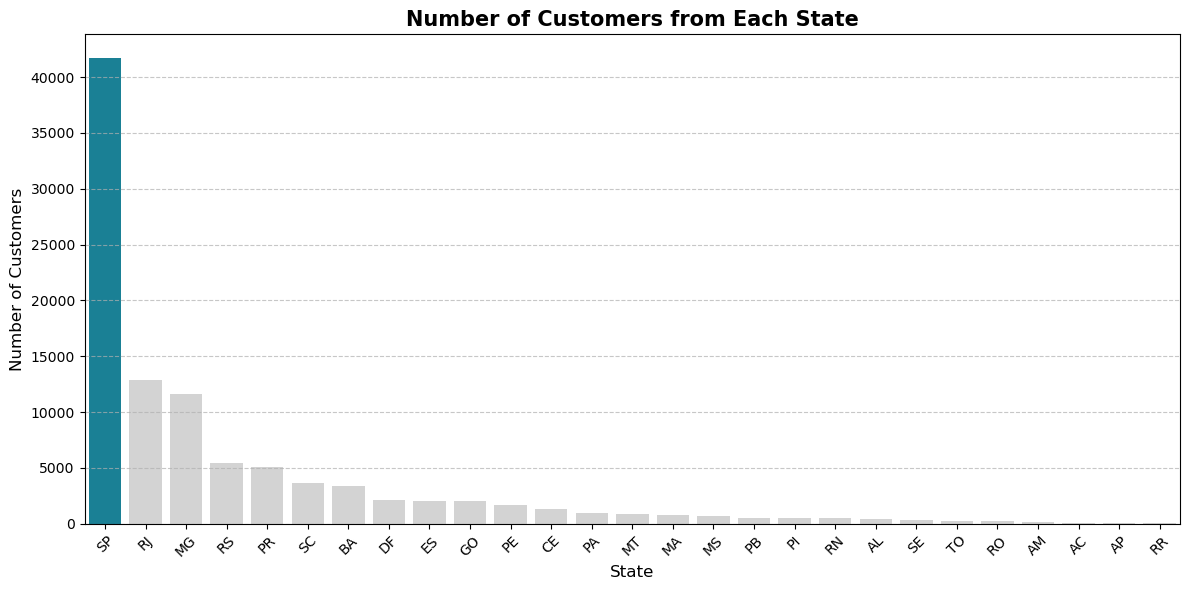

In [754]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

# Create a new column to define colors based on the most common state
bystate_df['color'] = ["Most Common" if state == most_common_state else "Other" for state in bystate_df['customer_state']]

bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

# Set the palette with only two colors
palette = {"Most Common": "#068DA9", "Other": "#D3D3D3"}

sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            hue='color',
            dodge=False,
            palette=palette,
            legend=False
            )

plt.title("Number of Customers from Each State", fontsize=15, weight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for clarity
plt.tight_layout()  # To prevent label cutoff
plt.show()


In the graph above, based on the state, SP has the highest number of customer data.

C:\Users\elluy\AppData\Local\Temp\ipykernel_22456\3166823886.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bycity_df.index,


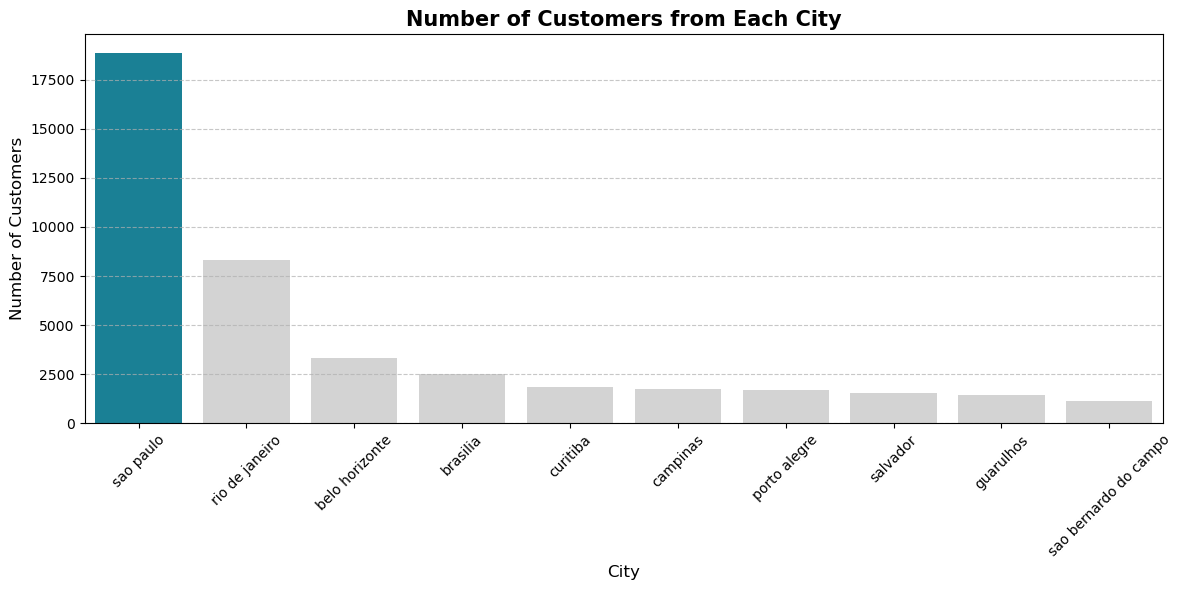

In [755]:
bycity_df = main_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = bycity_df.idxmax()

bycity_df = bycity_df.sort_values(ascending=False)

# Set the palette with only two colors
palette = ["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]

sns.barplot(x=bycity_df.index,
            y=bycity_df.values,
            palette=palette,
            dodge=False,
            legend=False  # Hide the legend
            )

plt.title("Number of Customers from Each City", fontsize=15, weight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for clarity
plt.tight_layout()  # To prevent label cutoff
plt.show()


In the graph above, based on the city, São Paulo has the highest number of customer data.

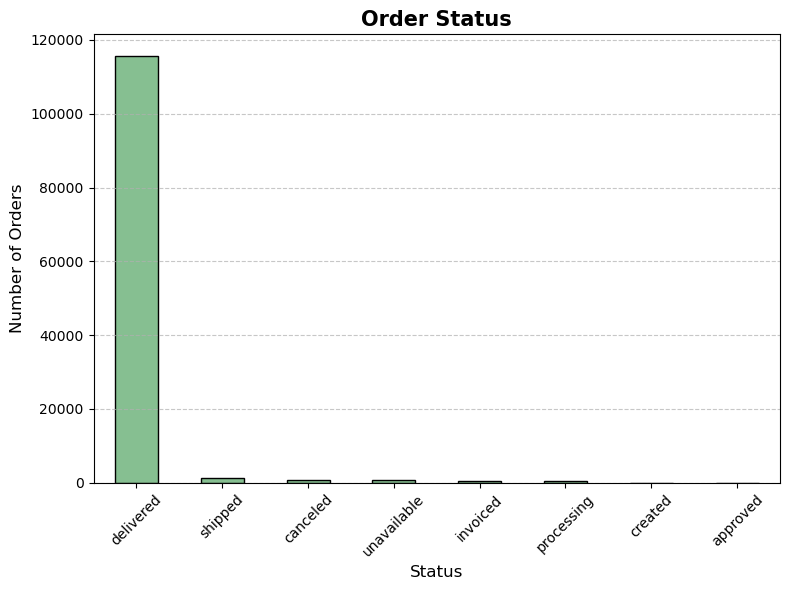

In [756]:
order_status_counts = main_data['order_status'].value_counts()

plt.figure(figsize=(8, 6))

order_status_counts.plot(kind='bar', color='#86bf91', edgecolor='black')

plt.title('Order Status', fontsize=15, weight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for clarity
plt.tight_layout()
plt.show()


In the graph above, the most common order status is delivered.

### Pertanyaan 3: Where are the majority of customers located based on geographical location?

In [757]:
other_state_geolocation = full_df['geo_df'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = full_df['geo_df'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [758]:
geolocation_silver = full_df['geo_df'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [759]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [760]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,sao bernardo do campo,SP,-23.730435,-46.541474
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,sao paulo,SP,-23.531294,-46.656980
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,mogi das cruzes,SP,-23.499025,-46.183436
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,campinas,SP,-22.974331,-47.142173


In [761]:
customers_silver = customers_silver.drop_duplicates(subset='customer_id')

In [762]:
customers_silver.to_csv("dashboard/geolocation.csv", index=False)

In [763]:
def plot_brazil_map(data):
    # Load Brazil map from URL
    brazil_map_url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
    brazil = mpimg.imread(urllib.request.urlopen(brazil_map_url), 'jpg')
    
    # Plot scatter of geolocation data
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(data['geolocation_lng'], data['geolocation_lat'], 
               alpha=0.5, s=5, c='maroon', label='Customer Location')  # Increase size and add label
    
    # Plot the map
    ax.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4], aspect='auto')  # Ensure correct extent

    # Improve aesthetics
    ax.set_title('Customer Distribution on Brazil Map', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.legend(loc='upper right')
    plt.axis('off')  # Turn off axis for a cleaner look

    # Show plot
    plt.show()

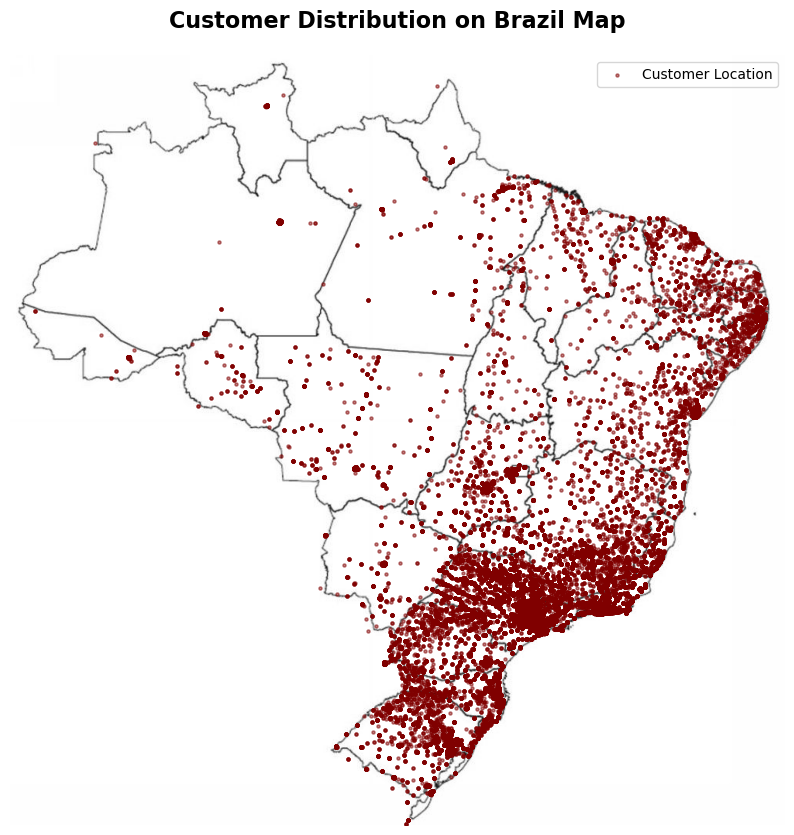

In [764]:
# Call the function with the data
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Many customers come from the southeastern and southern states.

**Insight:**
- The best-selling and least-selling products have been identified.
- The profitability of cheap versus expensive products has been analyzed.
- The demographic profile of customers has been explored, including differences in purchasing preferences.
- The geographical location of the majority of customers has been determined.

## Analisis Lanjutan (Opsional)

### 4. Who are the most recently active customers (recency)?
### 5. Which customers shop the most frequently (frequency)?
### 6. Which customers generate the highest revenue (monetary)?

In [765]:
# Calculate Recency, Frequency, and Monetary
snapshot_date = main_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
rfm_df = main_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

# Rename columns
rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Display the RFM table
print(rfm_df.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      338          1    114.74
1  000161a058600d5901f007fab4c27140      459          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      597          1    195.42
3  0002414f95344307404f0ace7a26f1d5      428          1    179.35
4  000379cdec625522490c315e70c7a9fb      199          1    107.01


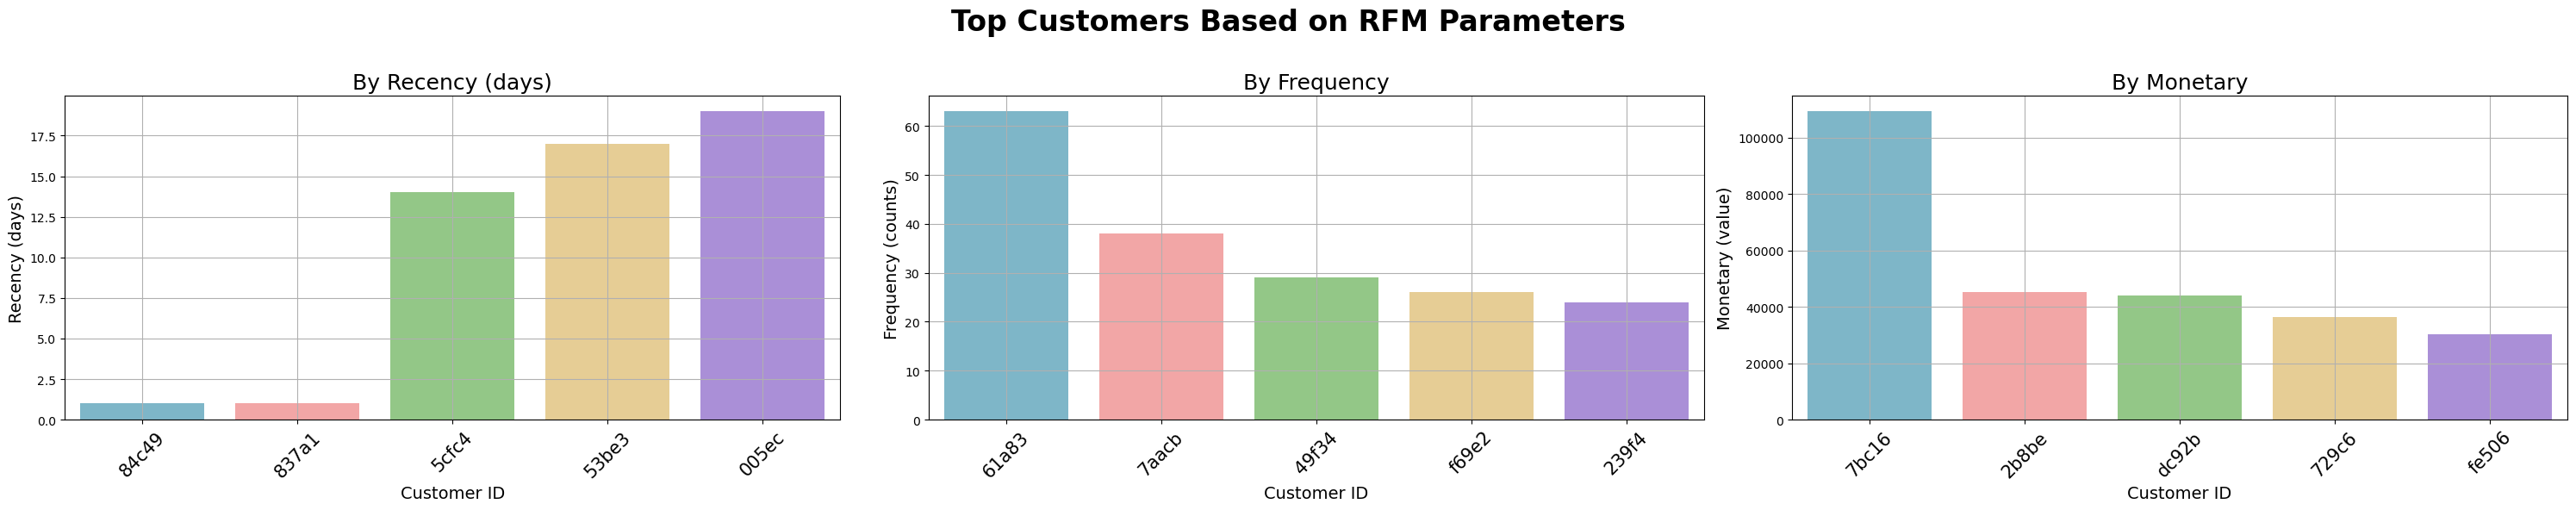

In [766]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Define colors (more varied for better distinction)
colors = ["#72BCD4", "#FF9999", "#8CD17D", "#F3D288", "#A783E3"]

# Shorten customer IDs for display
rfm_df['short_customer_id'] = rfm_df['customer_id'].astype(str).str[-5:]  # Keep only last 5 digits

# Plot Recency
sns.barplot(y="Recency", x="short_customer_id", hue="short_customer_id", 
            data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0], dodge=False)
ax[0].set_ylabel("Recency (days)", fontsize=14)
ax[0].set_xlabel("Customer ID", fontsize=14)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)
ax[0].grid(True)

# Plot Frequency
sns.barplot(y="Frequency", x="short_customer_id", hue="short_customer_id", 
            data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1], dodge=False)
ax[1].set_ylabel("Frequency (counts)", fontsize=14)
ax[1].set_xlabel("Customer ID", fontsize=14)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)
ax[1].grid(True)

# Plot Monetary
# Plot Monetary
sns.barplot(y="Monetary", x="short_customer_id", hue="short_customer_id", 
            data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2], dodge=False)
ax[2].set_ylabel("Monetary (value)", fontsize=14)
ax[2].set_xlabel("Customer ID", fontsize=14)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)
ax[2].grid(True)

# Set the main title
plt.suptitle("Top Customers Based on RFM Parameters", fontsize=24, weight='bold')

# Remove legend from subplots if they exist
if ax[0].get_legend() is not None:
    ax[0].get_legend().remove()
if ax[1].get_legend() is not None:
    ax[1].get_legend().remove()
if ax[2].get_legend() is not None:
    ax[2].get_legend().remove()

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to include the main title
plt.show()


In the graph above, it can be seen that id 84c49 has a small Recency indicating that he is the user who makes the most purchases. It can also be seen that id 61a83 has the highest transaction frequency. And id 7bc16 has the largest monetary or spent amount.

## Conclusion

- **What are the best-selling and least-selling products?** 
> The best-selling products are identified by the highest number of items sold, while the least-selling products are identified by the lowest number of items sold. This helps in understanding which products are more popular among customers.
> > The results of the visualization indicate that customers tend to purchase the product bed_bath_table more frequently than other items. In contrast, the product auto is the least frequently bought, reflecting a significant disparity in purchasing behavior among the different product categories.

- **Do they profit more from cheap or from expensive products?** 
> The analysis of profitability between cheap and expensive products shows that there is a correlation between product price and sell probability. This helps in determining the pricing strategy for maximizing revenue.
> > Olist generates more revenue not by focusing on a limited number of high-selling products but rather by offering a diverse range of products. Each of these products has a low probability of being sold individually, typically falling within a price range of 50 to 500 $.

- **What is the demographic profile of the customers, and are there any differences in purchasing preferences among them?** 
> The demographic profile of customers reveals differences in purchasing preferences based on geographical location. This information is useful for targeted marketing and improving customer satisfaction.
> > The state with the highest number of customers is SP, which means that the city with the most customers is São Paulo. The second-highest is RJ (Rio de Janeiro). The most common order status for customer items is delivered, indicating that the items ordered by customers were successfully sent without any issues.

- **Where are the majority of customers located based on geographical location?** 
> The majority of customers are located in specific geographical areas, which helps in optimizing logistics and delivery services to those regions.
> > According to the graph that has been created, there are more customers in the southeast and southern regions. Additionally, there are more customers in cities that are capitals, such as São Paulo, Rio de Janeiro, Porto Alegre, and others.

- **Who are the most recently active customers (recency)?** 
> By looking at the Recency column, we can identify customers who made the most recent purchases. Customers with the lowest Recency value are those who have recently transacted.
> > From the plot on the left (Recency), the customers with the lowest recency values (i.e., more recently active) are: 84c49, 837a1, 5cfc4, 53be3, and 005ec.
These customers made their most recent purchases compared to others, with 84c49 and 837a1 being the most recent.

- **Which customers shop the most frequently (frequency)?**
> The Frequency column shows the number of transactions or orders made by each customer. Customers with the highest Frequency values are the ones who shop most often.
> > From the middle plot (Frequency), the customers with the highest frequency values (i.e., they shop the most often) are: 61a83, 7aacb, 49f34, f69e2, and 239f4.
61a83 is the most frequent shopper.

- **Which customers generate the highest revenue (monetary)?**
> The Monetary column shows the total amount spent by each customer. This allows us to identify the customers who contribute the most revenue to the business.
> > From the right plot (Monetary), the customers with the highest monetary values (i.e., they spend the most) are: 7bc16, 2b8be, dc92b, 729c6, and fe506.
7bc16 is the customer who generates the highest revenue.
